# SVM classifier 

- Breast Cancer Dataset (In-built)

### Step 1: Import necessary libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

### Step 2: Load and prepare the dataset


In [24]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

### Step 3: Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)


### Step 4: Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 5: Train an SVM classifier

In [ ]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

### Step 6: Make predictions

In [ ]:
y_pred = svm_classifier.predict(X_test)

### Step 7: Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(accuracy)
print(conf_matrix)
print(classification_rep)

0.9707602339181286
[[ 64   1]
 [  4 102]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.99      0.96      0.98       106

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### Step 8: Visualize results using PCA

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
X_train_pca

array([[-2.48600125e+00,  2.64609397e+00],
       [ 4.95927055e+00, -1.35460110e-01],
       [-2.52402194e+00, -1.77568392e+00],
       [-3.02741497e+00, -7.85880090e-02],
       [ 5.17923427e+00, -2.92833784e+00],
       [ 4.92745553e-01, -8.71151865e-01],
       [-2.07832011e+00,  1.02764146e-01],
       [ 6.65833266e+00, -1.86557642e+00],
       [-1.94675457e+00, -2.24781823e-01],
       [ 8.74416307e+00, -4.31129832e+00],
       [-3.51870000e+00,  9.81001587e-01],
       [ 7.21643667e+00,  1.28421205e+01],
       [ 2.94419290e+00, -1.14685965e+00],
       [-7.45709853e-01, -2.03707495e+00],
       [-3.13957014e+00, -2.04296502e+00],
       [-1.15041100e+00, -1.53615190e+00],
       [ 5.72380891e+00,  8.36098353e-01],
       [ 1.17782010e+00,  8.37720100e+00],
       [-3.13283438e+00, -1.80524504e+00],
       [-4.08434223e+00, -1.29502753e+00],
       [ 5.74993193e+00, -4.34342721e+00],
       [-2.96173281e+00, -2.09239877e+00],
       [-2.05994086e+00, -1.88923547e+00],
       [-3.

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

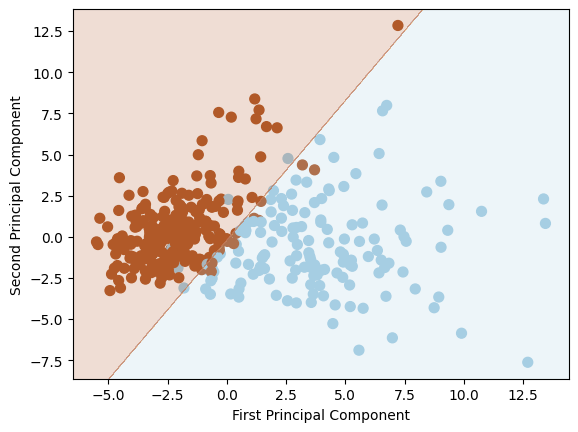

In [ ]:
# Plot the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, s=50, label="Training Data")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the decision boundary
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [ ]:
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
xx

array([[-6.49694542, -6.47694542, -6.45694542, ..., 14.38305458,
        14.40305458, 14.42305458],
       [-6.49694542, -6.47694542, -6.45694542, ..., 14.38305458,
        14.40305458, 14.42305458],
       [-6.49694542, -6.47694542, -6.45694542, ..., 14.38305458,
        14.40305458, 14.42305458],
       ...,
       [-6.49694542, -6.47694542, -6.45694542, ..., 14.38305458,
        14.40305458, 14.42305458],
       [-6.49694542, -6.47694542, -6.45694542, ..., 14.38305458,
        14.40305458, 14.42305458],
       [-6.49694542, -6.47694542, -6.45694542, ..., 14.38305458,
        14.40305458, 14.42305458]])

In [ ]:
yy.shape

(1124, 1047)

In [ ]:
xx.ravel()

array([-6.49694542, -6.47694542, -6.45694542, ..., 14.38305458,
       14.40305458, 14.42305458])

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

array([[-6.49694542, -8.62409644],
       [-6.47694542, -8.62409644],
       [-6.45694542, -8.62409644],
       ...,
       [14.38305458, 13.83590356],
       [14.40305458, 13.83590356],
       [14.42305458, 13.83590356]])

In [ ]:
pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

array([[ 0.62352797, -0.33768779,  0.40539476, ..., -1.46204718,
        -1.80448605, -3.17455764],
       [ 0.62790296, -0.33537301,  0.40994302, ..., -1.45706612,
        -1.80201316, -3.1718938 ],
       [ 0.63227794, -0.33305824,  0.41449129, ..., -1.45208505,
        -1.79954026, -3.16922996],
       ...,
       [-0.1341414 ,  1.0000658 ,  0.25012439, ...,  3.33180986,
         3.38460192,  5.62045437],
       [-0.12976641,  1.00238058,  0.25467265, ...,  3.33679092,
         3.38707482,  5.62311821],
       [-0.12539143,  1.00469535,  0.25922091, ...,  3.34177199,
         3.38954772,  5.62578204]])

### Step 9: Print results

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 64   1]
 [  4 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.99      0.96      0.98       106

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

